# GDP Data extraction and processing


## Project Scenario:In this project, I worked as a Junior Data Engineer for a simulated international firm that plans to expand its business across multiple countries. The objective of this project is to build a Python script that extracts and processes data for the top 10 largest economies in the world, ranked in descending order of GDP
The required data is available at the following URL:
https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29al%29

In [5]:
import numpy as np
import pandas as pd

In [6]:
URL="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"

In [7]:
tables = pd.read_html(URL)
df = tables[3]

df.columns = range(df.shape[1])

# Retain columns with index 0 and 2 
df = df[[0,2]]

# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.
df = df.iloc[1:11,:]

# Assign column names as "Country" and "GDP (Million USD)"
df.columns = ['Country','GDP (Million USD)']


In [8]:
df['GDP (Million USD)'] = df['GDP (Million USD)'].astype(int)

# Convert the GDP value in Million USD to Billion USD
df[['GDP (Million USD)']] = df[['GDP (Million USD)']]/1000

# Use numpy.round() method to round the value to 2 decimal places.
df[['GDP (Million USD)']] = np.round(df[['GDP (Million USD)']], 2)

# Rename the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'
df.rename(columns = {'GDP (Million USD)' : 'GDP (Billion USD)'})


,Country,GDP (Billion USD)
1,United States,26854.60
2,China,19373.59
3,Japan,4409.74
4,Germany,4308.85
5,India,3736.88
6,United Kingdom,3158.94
7,France,2923.49
8,Italy,2169.74
9,Canada,2089.67
10,Brazil,2081.24


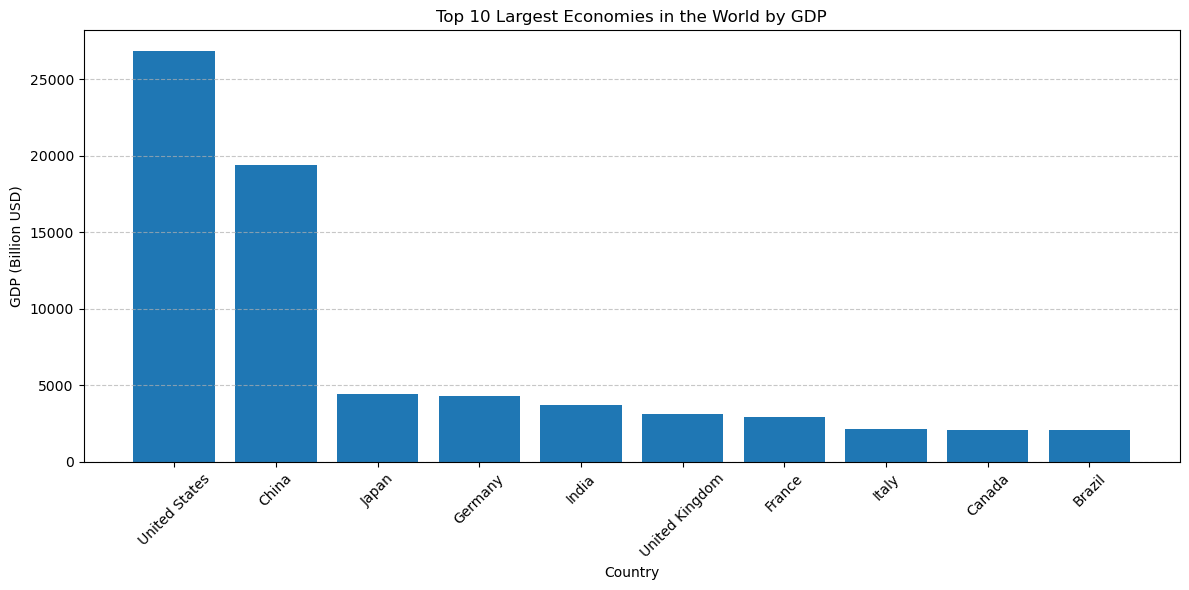

In [12]:
df.rename(columns={'GDP (Million USD)': 'GDP (Billion USD)'}, inplace=True)

top10 = df.sort_values(by='GDP (Billion USD)', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top10['Country'], top10['GDP (Billion USD)'])
plt.xlabel('Country')
plt.ylabel('GDP (Billion USD)')
plt.title('Top 10 Largest Economies in the World by GDP')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Visualization Summary
*Multiple visualizations are used to better understand the relative economic sizes of the top 10 countries. 
Bar and line charts help in comparing absolute GDP values and their proportional contributions*

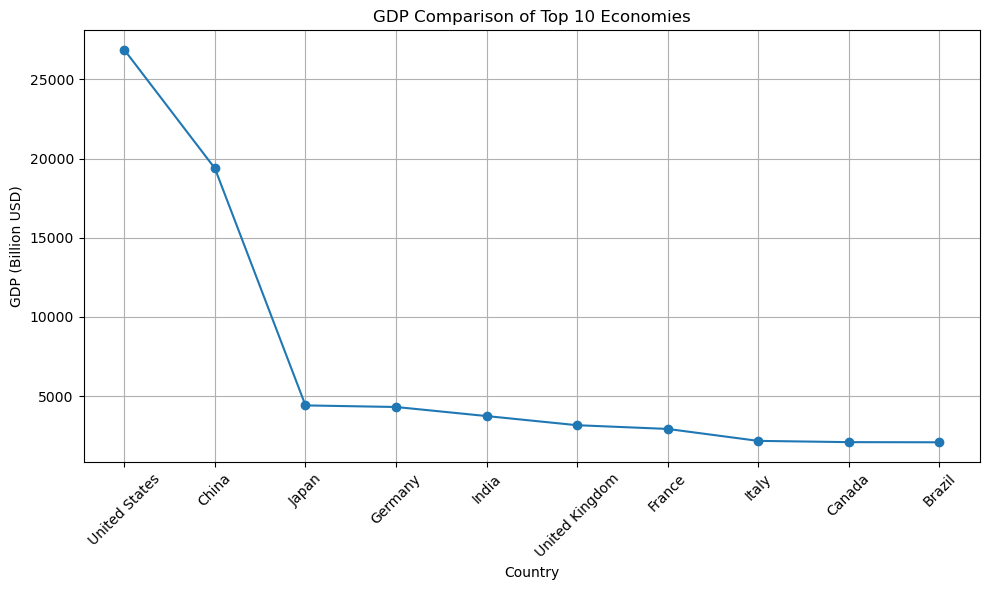

In [18]:
plt.figure(figsize=(10,6))
plt.plot(top10['Country'], top10['GDP (Billion USD)'], marker='o')
plt.xlabel('Country')
plt.ylabel('GDP (Billion USD)')
plt.title('GDP Comparison of Top 10 Economies')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


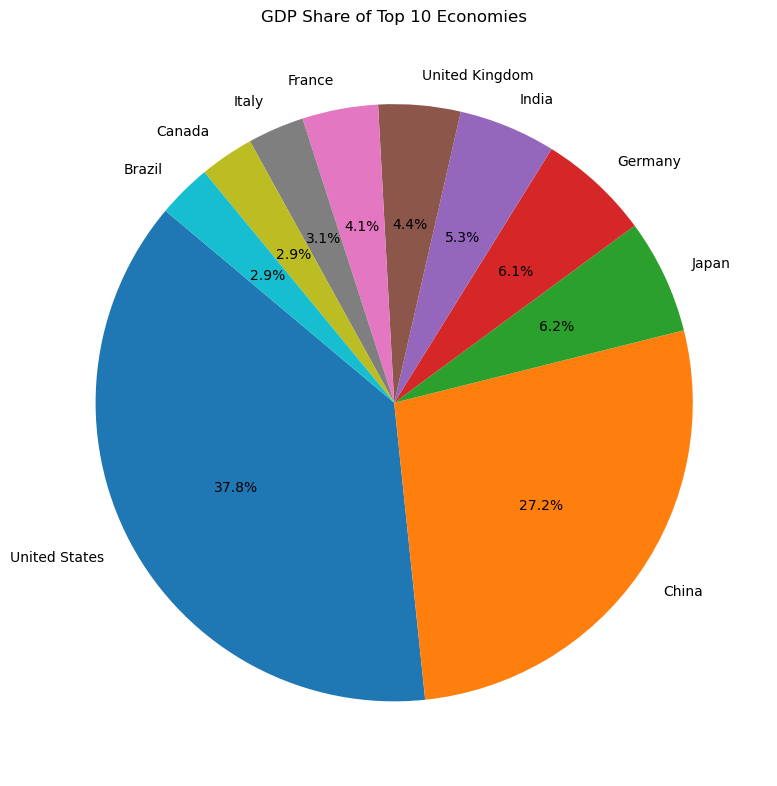

In [17]:
plt.figure(figsize=(8,8))
plt.pie(
    top10['GDP (Billion USD)'],
    labels=top10['Country'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('GDP Share of Top 10 Economies')
plt.tight_layout()
plt.show()


In [19]:
df.to_csv('./Largest_economies.csv')